In [1]:
import warnings; warnings.filterwarnings("ignore", message="Initializing zero-element tensors is a no-op")
import pandas as pd
import torch
import os 
from utils.eval_utils import get_pairs, eval_epochs, LFWSingleDataset

from utils.utils import transform
from models.NN2 import FaceNet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

IMAGES_PATH = './data/LFW/lfw-faces/'
DF_PATH = './data/LFW/'
EPOCHS_PATH = './checkpoints/'

In [2]:
test_df = pd.read_csv(os.path.join(DF_PATH, 'lfw_faces_test.csv'))
print(f'Test data shape: {test_df.shape}')

pairs = get_pairs(test_df, 1024)
print(f'Pairs shape: {pairs.shape}')

# Adiciona o path
pairs['img1'] = pairs['img1'].apply(lambda x: os.path.join(IMAGES_PATH, x))
pairs['img2'] = pairs['img2'].apply(lambda x: os.path.join(IMAGES_PATH, x))

Test data shape: (567, 2)
Pairs shape: (1024, 3)


In [3]:
pairs.head()

,img1,img2,label
0,./data/LFW/lfw-faces/Pierce_Brosnan_0014.jpg,./data/LFW/lfw-faces/Pierce_Brosnan_0006.jpg,1
1,./data/LFW/lfw-faces/Pierce_Brosnan_0014.jpg,./data/LFW/lfw-faces/Richard_Myers_0005.jpg,0
2,./data/LFW/lfw-faces/Sheryl_Crow_0002.jpg,./data/LFW/lfw-faces/Sheryl_Crow_0005.jpg,1
3,./data/LFW/lfw-faces/Sheryl_Crow_0002.jpg,./data/LFW/lfw-faces/Renee_Zellweger_0011.jpg,0
4,./data/LFW/lfw-faces/Jesse_Jackson_0005.jpg,./data/LFW/lfw-faces/Jesse_Jackson_0006.jpg,1


# **VAL, FAR, ROC, Dists**

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)
Calculating distances: 100%|██████████| 32/3

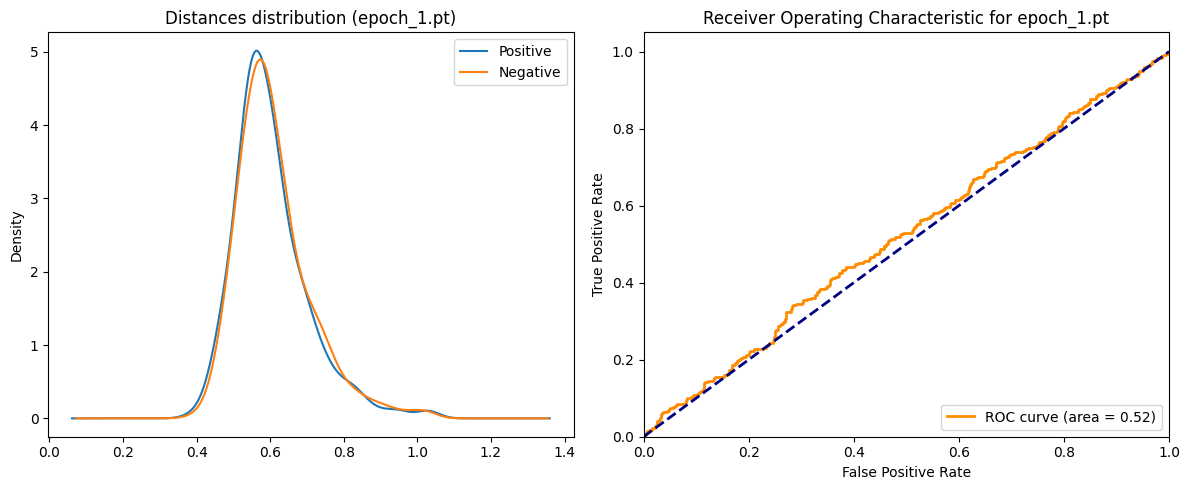

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: 0.3861
[epoch_1.pt] Accuracy: 0.5000
[epoch_1.pt] VAL: 0.0000

[epoch_1.pt] Positive mean: 0.6032 ± 0.1012
[epoch_1.pt] Negative mean: 0.6101 ± 0.1014


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.22it/s]


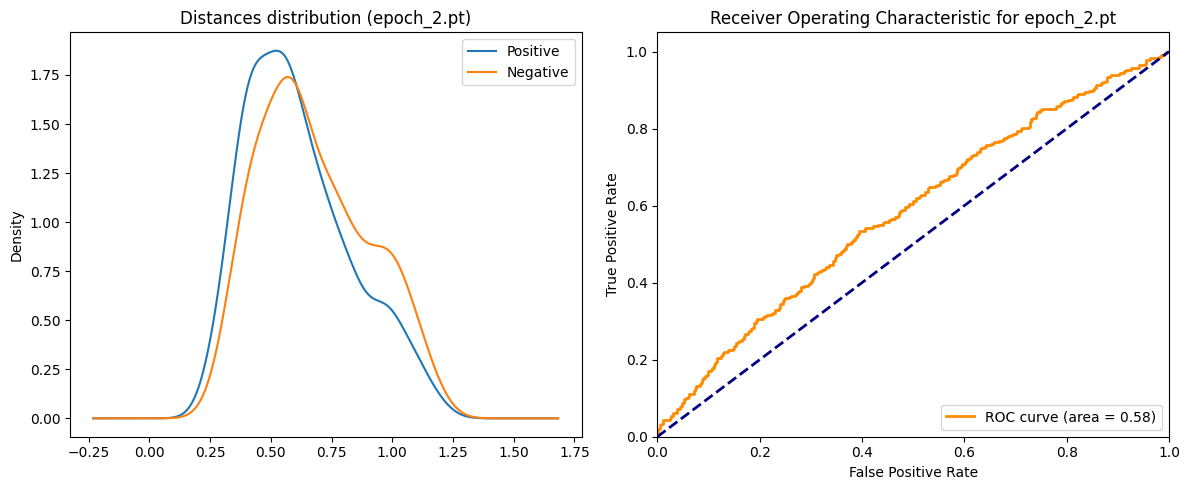

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: 0.2470
[epoch_2.pt] Accuracy: 0.5000
[epoch_2.pt] VAL: 0.0000

[epoch_2.pt] Positive mean: 0.6134 ± 0.2158
[epoch_2.pt] Negative mean: 0.6762 ± 0.2241


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.19it/s]


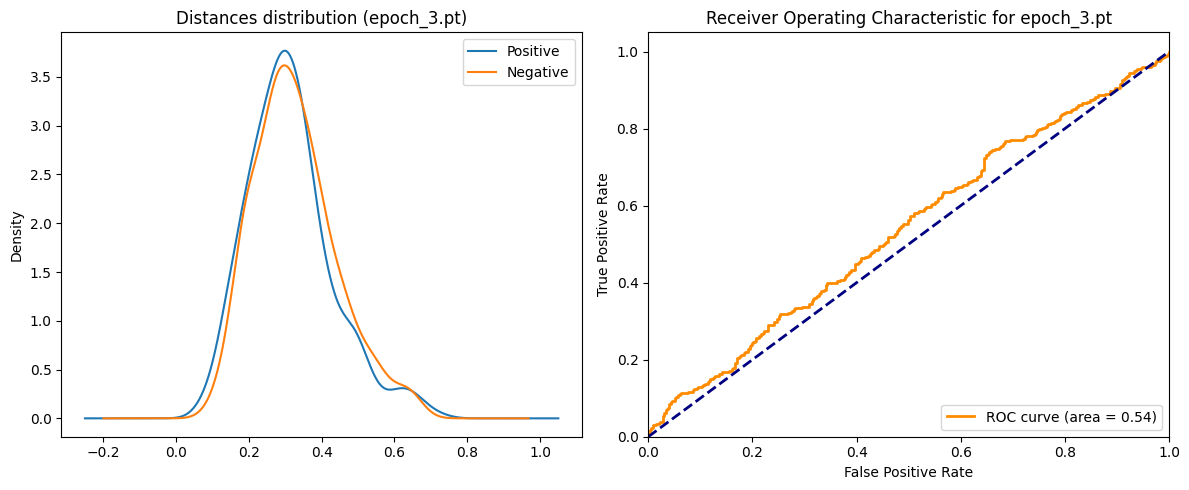

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: 0.0874
[epoch_3.pt] Accuracy: 0.5029
[epoch_3.pt] VAL: 0.0059

[epoch_3.pt] Positive mean: 0.3123 ± 0.1168
[epoch_3.pt] Negative mean: 0.3272 ± 0.1138


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.16it/s]


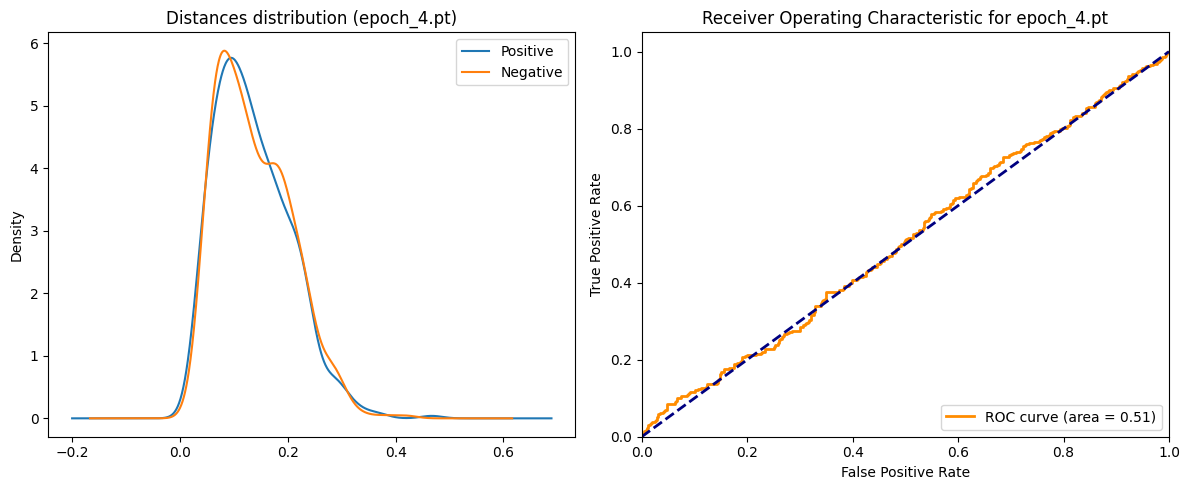

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: 0.0250
[epoch_4.pt] Accuracy: 0.5020
[epoch_4.pt] VAL: 0.0039

[epoch_4.pt] Positive mean: 0.1354 ± 0.0689
[epoch_4.pt] Negative mean: 0.1376 ± 0.0683


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.19it/s]


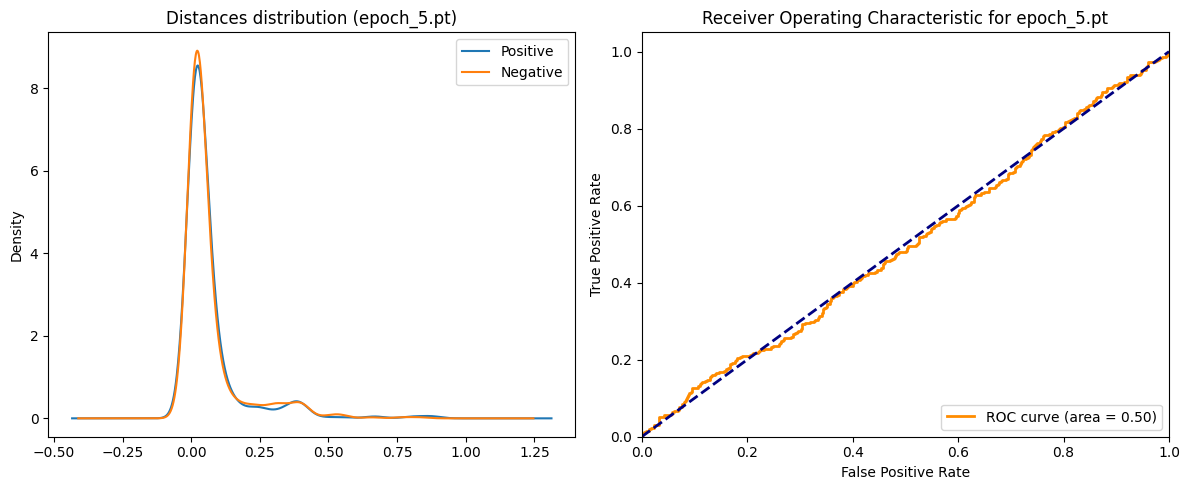

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: 0.0031
[epoch_5.pt] Accuracy: 0.5010
[epoch_5.pt] VAL: 0.0020

[epoch_5.pt] Positive mean: 0.0670 ± 0.1197
[epoch_5.pt] Negative mean: 0.0677 ± 0.1136


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.19it/s]


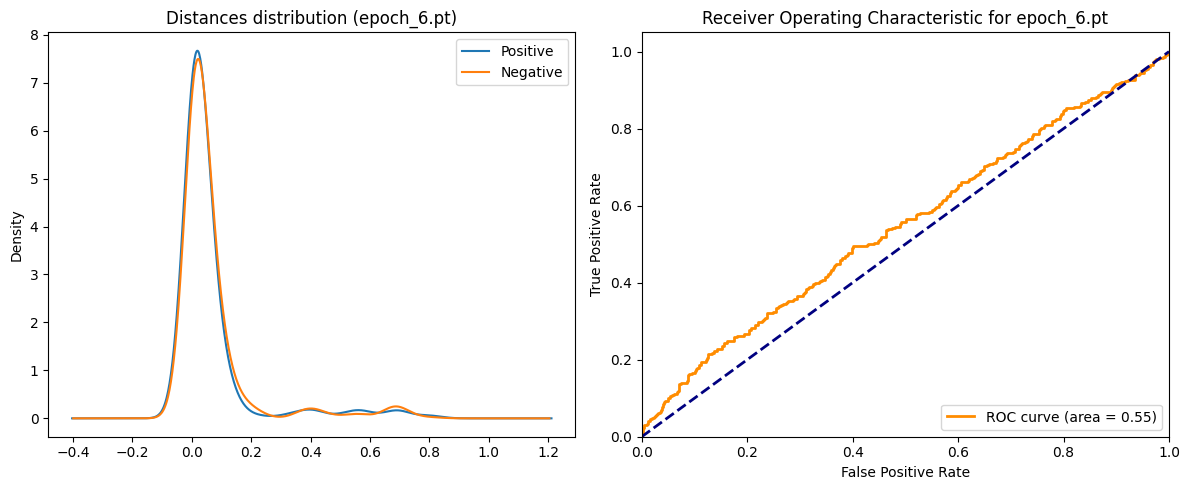

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: 0.0015
[epoch_6.pt] Accuracy: 0.5039
[epoch_6.pt] VAL: 0.0078

[epoch_6.pt] Positive mean: 0.0656 ± 0.1418
[epoch_6.pt] Negative mean: 0.0695 ± 0.1392


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.20it/s]


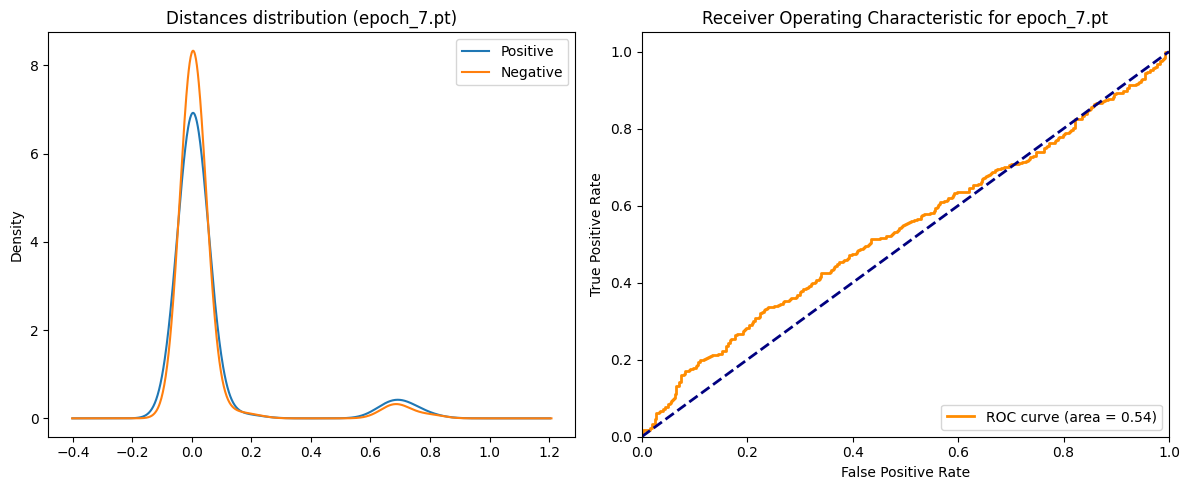

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: 0.0003
[epoch_7.pt] Accuracy: 0.5029
[epoch_7.pt] VAL: 0.0059

[epoch_7.pt] Positive mean: 0.0569 ± 0.1816
[epoch_7.pt] Negative mean: 0.0421 ± 0.1527


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.14it/s]


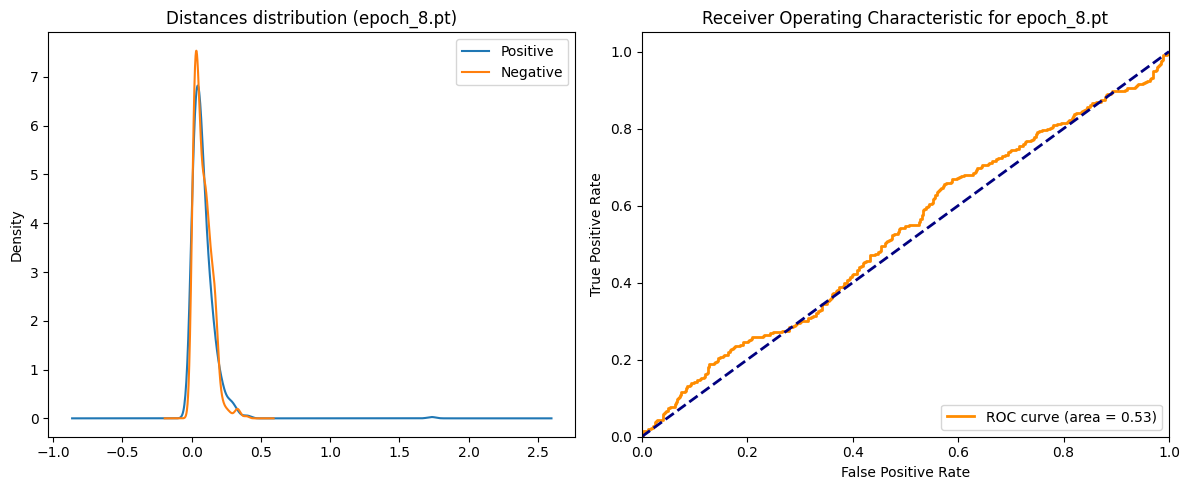

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: -inf
[epoch_8.pt] Accuracy: 0.5000
[epoch_8.pt] VAL: 0.0000

[epoch_8.pt] Positive mean: 0.0831 ± 0.1003
[epoch_8.pt] Negative mean: 0.0827 ± 0.0633


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.15it/s]


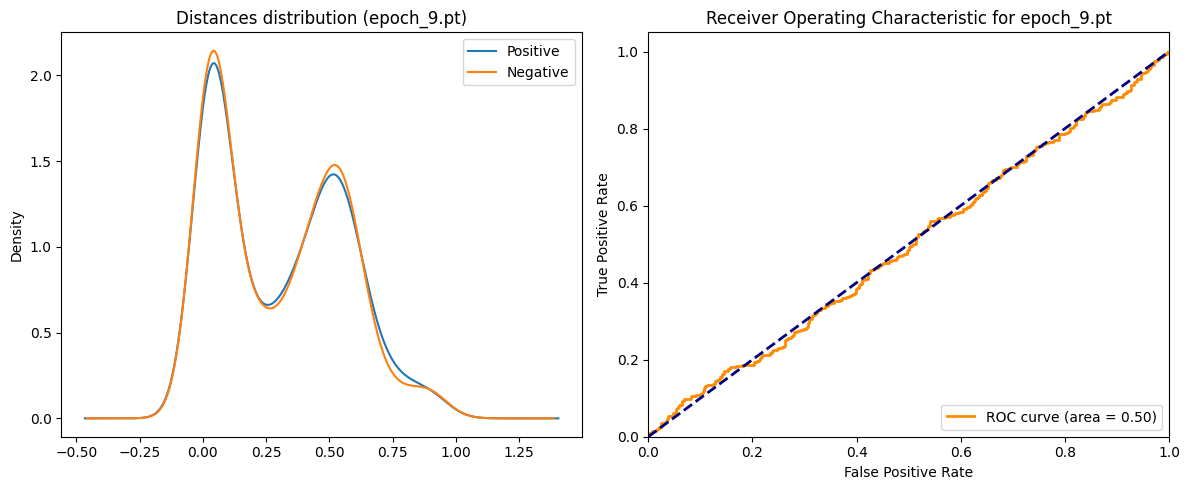

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: 0.0027
[epoch_9.pt] Accuracy: 0.5029
[epoch_9.pt] VAL: 0.0059

[epoch_9.pt] Positive mean: 0.3058 ± 0.2567
[epoch_9.pt] Negative mean: 0.3005 ± 0.2543


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.18it/s]


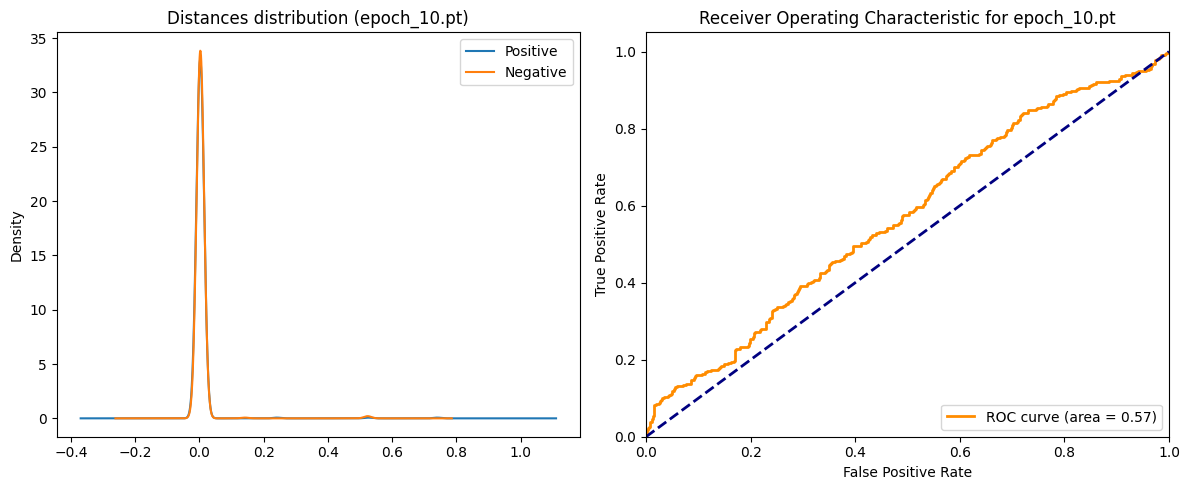

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: 0.0003
[epoch_10.pt] Accuracy: 0.5039
[epoch_10.pt] VAL: 0.0078

[epoch_10.pt] Positive mean: 0.0054 ± 0.0413
[epoch_10.pt] Negative mean: 0.0062 ± 0.0403


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.18it/s]


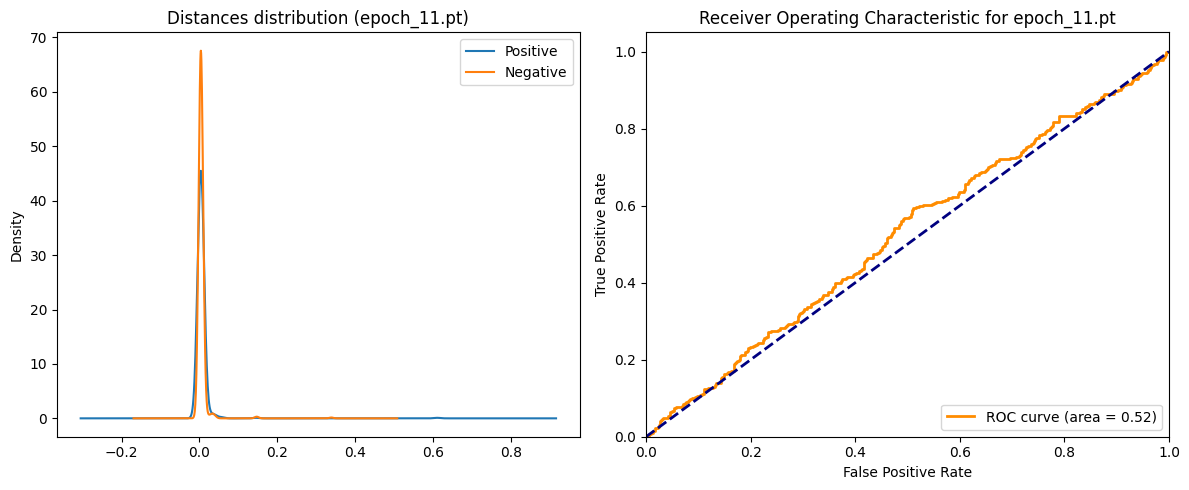

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: -inf
[epoch_11.pt] Accuracy: 0.5000
[epoch_11.pt] VAL: 0.0000

[epoch_11.pt] Positive mean: 0.0059 ± 0.0281
[epoch_11.pt] Negative mean: 0.0056 ± 0.0178


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.10it/s]


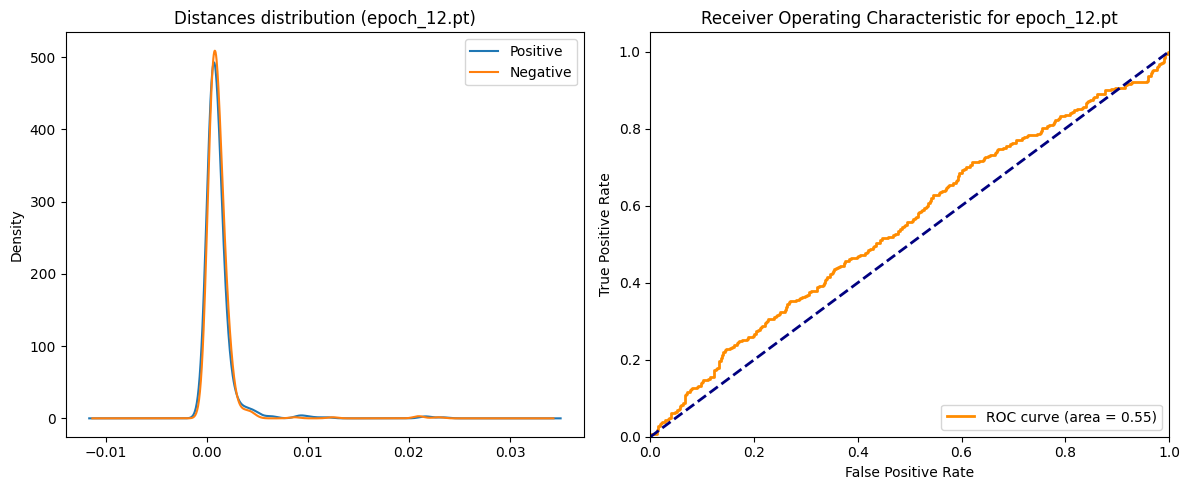

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: 0.0001
[epoch_12.pt] Accuracy: 0.5010
[epoch_12.pt] VAL: 0.0020

[epoch_12.pt] Positive mean: 0.0012 ± 0.0020
[epoch_12.pt] Negative mean: 0.0012 ± 0.0018


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.13it/s]


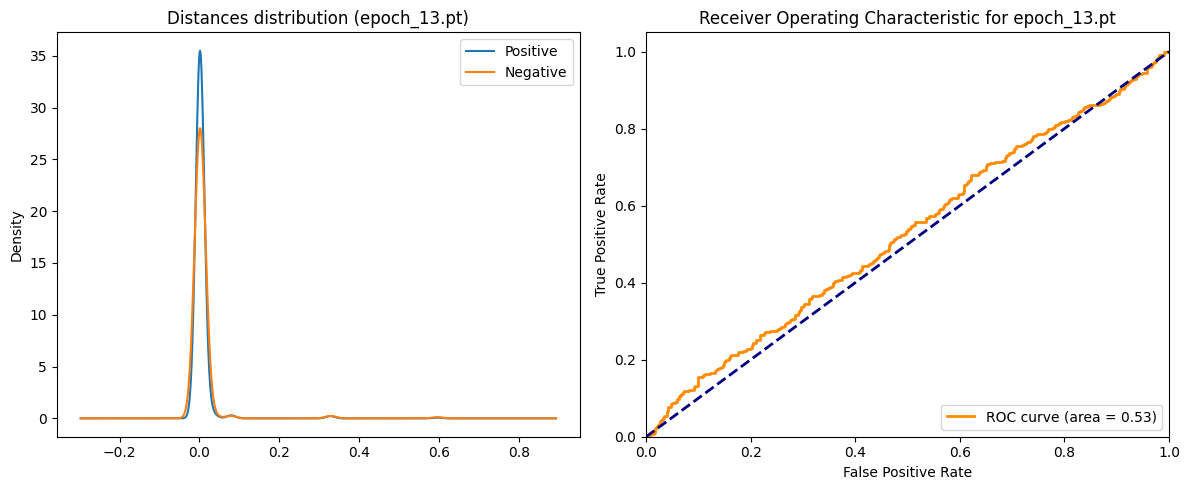

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: -inf
[epoch_13.pt] Accuracy: 0.5000
[epoch_13.pt] VAL: 0.0000

[epoch_13.pt] Positive mean: 0.0057 ± 0.0369
[epoch_13.pt] Negative mean: 0.0075 ± 0.0473


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.11it/s]


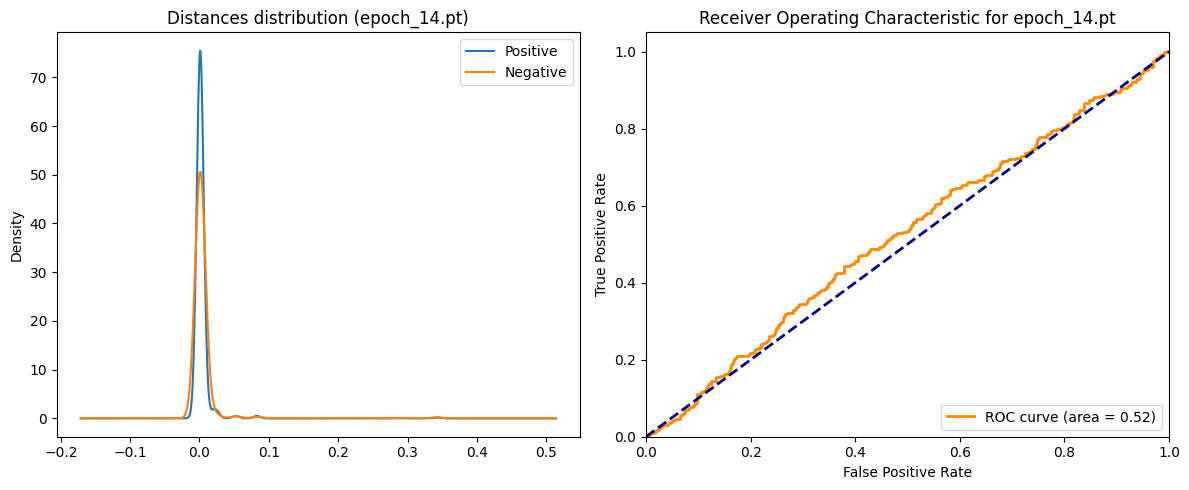

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: 0.0000
[epoch_14.pt] Accuracy: 0.5000
[epoch_14.pt] VAL: 0.0000

[epoch_14.pt] Positive mean: 0.0032 ± 0.0171
[epoch_14.pt] Negative mean: 0.0044 ± 0.0260


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.07it/s]


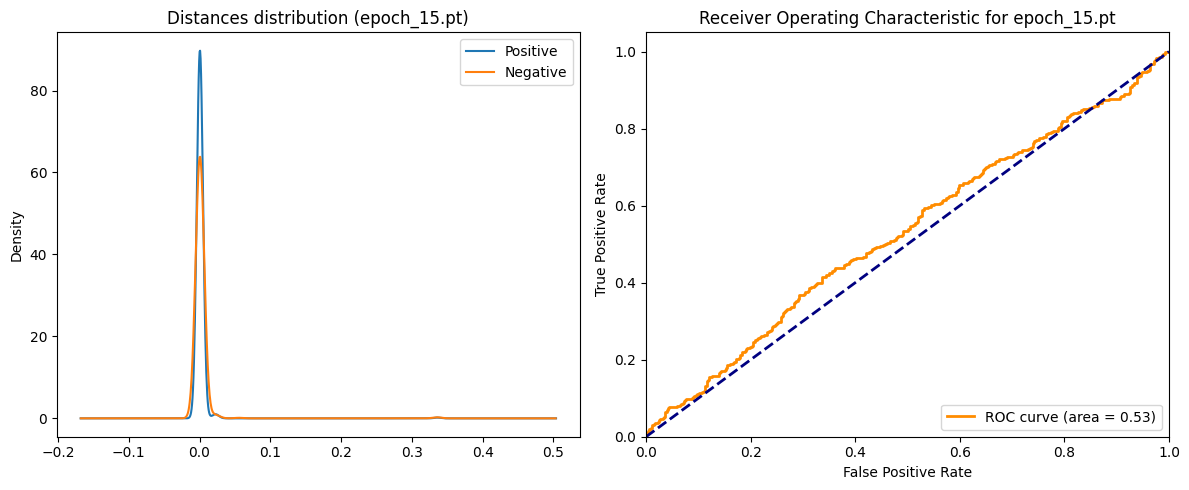

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: 0.0000
[epoch_15.pt] Accuracy: 0.5010
[epoch_15.pt] VAL: 0.0020

[epoch_15.pt] Positive mean: 0.0016 ± 0.0150
[epoch_15.pt] Negative mean: 0.0024 ± 0.0212


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.12it/s]


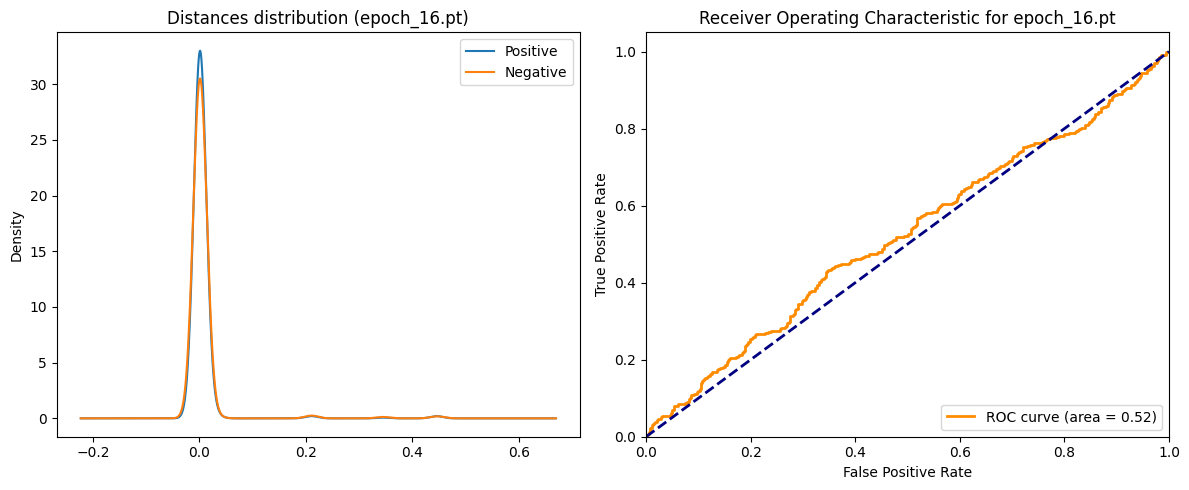

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: -inf
[epoch_16.pt] Accuracy: 0.5000
[epoch_16.pt] VAL: 0.0000

[epoch_16.pt] Positive mean: 0.0060 ± 0.0405
[epoch_16.pt] Negative mean: 0.0068 ± 0.0441


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.08it/s]


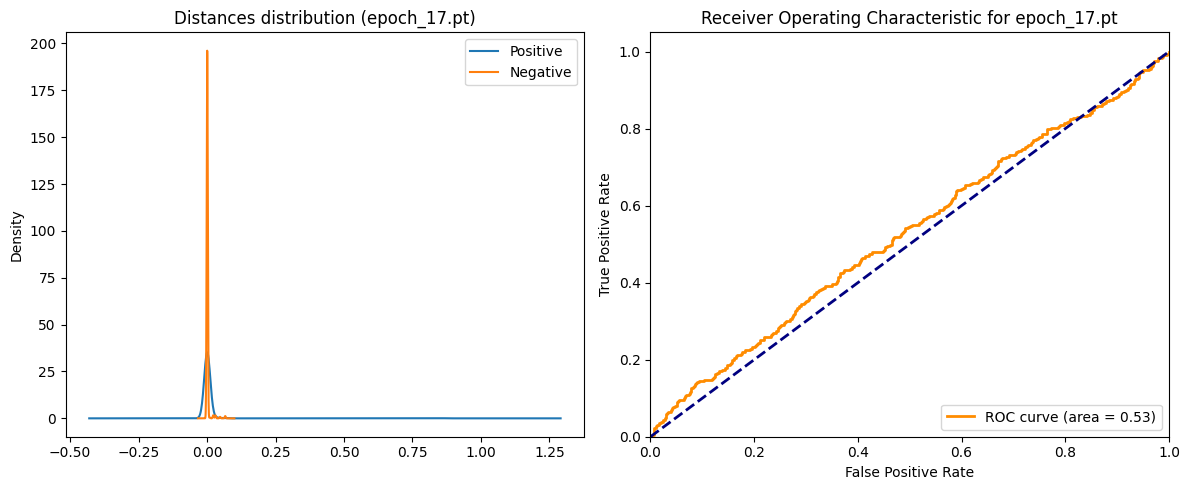

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: -inf
[epoch_17.pt] Accuracy: 0.5000
[epoch_17.pt] VAL: 0.0000

[epoch_17.pt] Positive mean: 0.0031 ± 0.0385
[epoch_17.pt] Negative mean: 0.0016 ± 0.0066


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.08it/s]


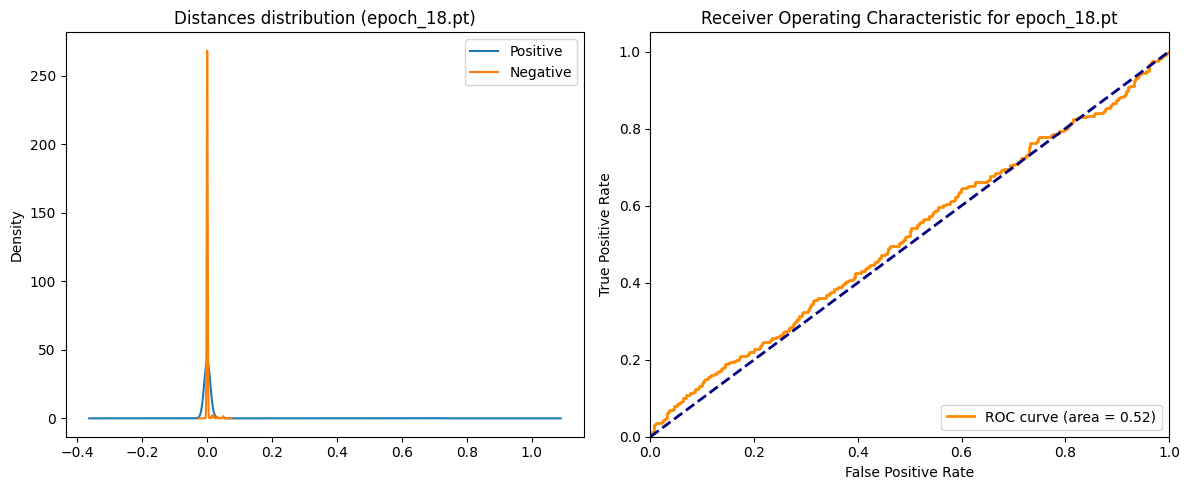

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: -inf
[epoch_18.pt] Accuracy: 0.5000
[epoch_18.pt] VAL: 0.0000

[epoch_18.pt] Positive mean: 0.0025 ± 0.0324
[epoch_18.pt] Negative mean: 0.0012 ± 0.0048


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.08it/s]


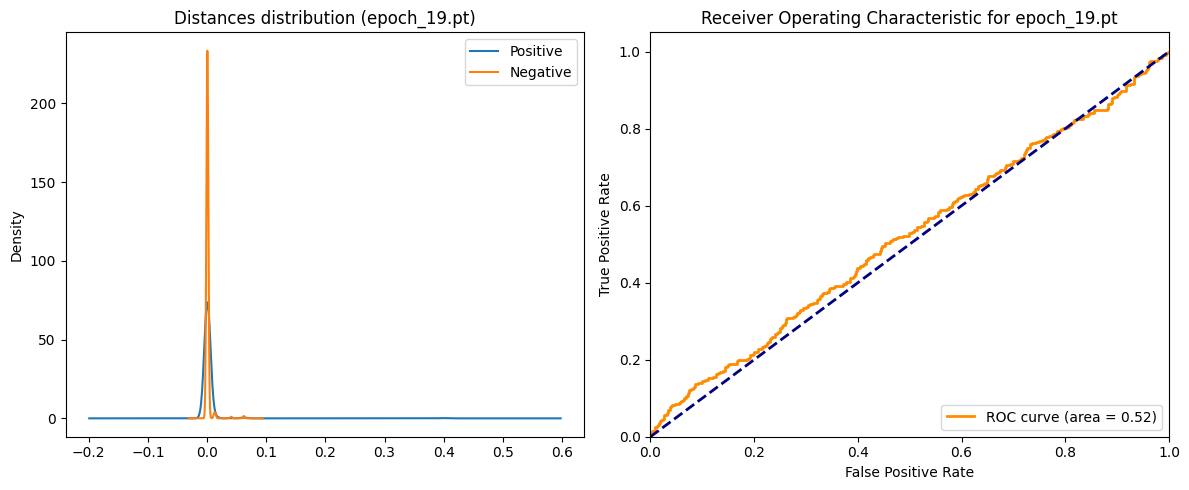

/home/lucca-wsl/ML/facenet2/utils/eval_utils.py:106: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


Target FAR: 1e-03 | Threshold: -inf
[epoch_19.pt] Accuracy: 0.5000
[epoch_19.pt] VAL: 0.0000

[epoch_19.pt] Positive mean: 0.0020 ± 0.0183
[epoch_19.pt] Negative mean: 0.0013 ± 0.0056


Calculating distances: 100%|██████████| 32/32 [00:03<00:00, 10.05it/s]


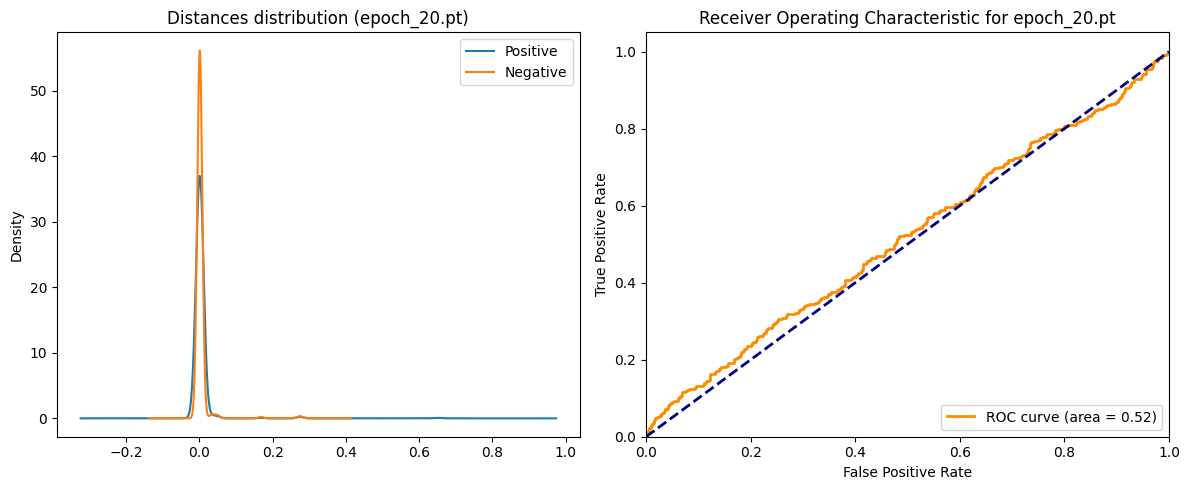

Target FAR: 1e-03 | Threshold: -inf
[epoch_20.pt] Accuracy: 0.5000
[epoch_20.pt] VAL: 0.0000

[epoch_20.pt] Positive mean: 0.0045 ± 0.0364
[epoch_20.pt] Negative mean: 0.0037 ± 0.0239


In [4]:
eval_epochs(epochs_path=EPOCHS_PATH, 
            pairs=pairs,
            model_class=FaceNet, 
            batch_size=32,
            transform=transform, 
            device=device,
            target_far=1e-3)

# **Visualizar os embeddings**

In [5]:
import os
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [10]:
test_df['path'] = test_df['path'].apply(lambda x: os.path.join(IMAGES_PATH, x))

/tmp/ipykernel_306562/762888338.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load = torch.load(model_path)


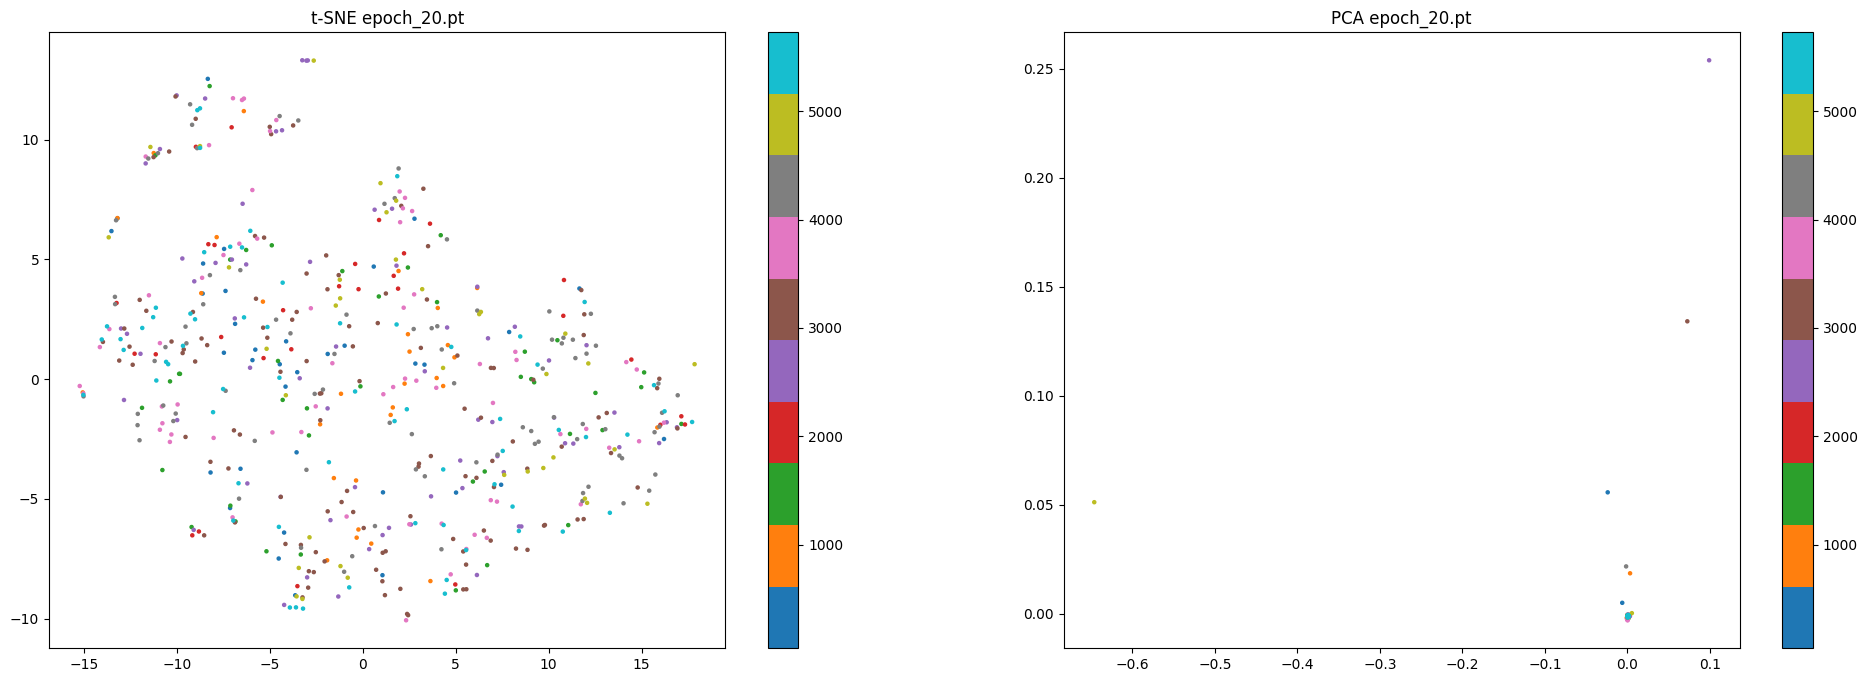

In [12]:
def view_embs(epochs_path, model_class, test_df, transform, device):
    models_name = os.listdir(epochs_path)
    models_name = [model for model in models_name if 'bons' not in model]
    models_name_sorted = sorted(models_name, key=lambda x: int(x.replace('.pt', '').split('_')[1]))
    model = models_name_sorted[-1]
    
    modelo = model_class(emb_size=64).to(device)
    modelo.eval()

    test_dataset = LFWSingleDataset(test_df, transform=transform)
    test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True, num_workers=0)

    model_path = os.path.join(epochs_path, model)
    load = torch.load(model_path)
    load = {k.replace('_orig_mod.', ''): v for k, v in load.items()}
    modelo.load_state_dict(load)
    
    embeddings = []
    with torch.no_grad():
        for (imgs, labels) in test_dataloader:
            images = imgs.to(device)
            embeddings.append(modelo(images).cpu().numpy())
    embeddings = np.concatenate(embeddings)
    
    # Reduzir dimensionalidade com t-SNE
    tsne = TSNE(n_components=2, perplexity=30, max_iter=300)
    embeddings_tsne = tsne.fit_transform(embeddings)
    
    # Reduzir dimensionalidade com PCA
    pca = PCA(n_components=2)
    embeddings_pca = pca.fit_transform(embeddings)
    
    plt.figure(figsize=(24, 8))
    
    # Plotar t-SNE
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=test_df['id'], cmap='tab10', s=5)
    plt.colorbar(scatter)
    plt.title(f't-SNE {model}')
    
    # Plotar PCA
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=test_df['id'], cmap='tab10', s=5)
    plt.colorbar(scatter)
    plt.title(f'PCA {model}')
    
    plt.show()

view_embs(EPOCHS_PATH, FaceNet, test_df, transform, device)